In [266]:
#imports 
import numpy as np
import pandas as pd
import gzip
from matplotlib import pyplot as plt
import pandas as pd

# Loading the data

### Training data

#### *Data loading*

In [267]:
# Importing training data
f = gzip.open("./Data/train-images-idx3-ubyte.gz", "r")
# defining the number of images and the number of pixels
image_size = 28
num_imgs = 10000
test_num_imgs = int(num_imgs * 0.2)

# reading every string literal in the file and assigning it to buf
f.read(16)
buf = f.read(num_imgs * image_size * image_size)
print(buf[0:2000])
# Convert each literal/ string to the float and assign it to the x_train
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# Reshaping the Training data suitable for learning
X_train = X_train.reshape(num_imgs, image_size, image_size, 1)

b"\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x12\x12\x12~\x88\xaf\x1a\xa6\xff\xf7\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e$^\x9a\xaa\xfd\xfd\xfd\xfd\xfd\xe1\xac\xfd\xf2\xc3@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x001\xee\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfb]RR8'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\xdb\xfd\xfd\xfd\xfd\xfd\xc6\xb6\xf7\xf1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

#### *Label loading*

In [268]:
# Importing training labels
f = gzip.open("./Data/train-labels-idx1-ubyte.gz","rb")
# reading every string literal in the file and assigning it to buf
# Convert each literal/ string to the float and assign it to the x_train
y_train = []
#reason for the statement below is that the data in the files start after 8 literals from the original file
buf = f.read(8)
for i in range(num_imgs):
    buf = f.read(1)
    # print(buf)
    ind_label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    y_train.append(ind_label[0])
y_train = np.asarray(y_train)
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


#### *Checking validity of train data*

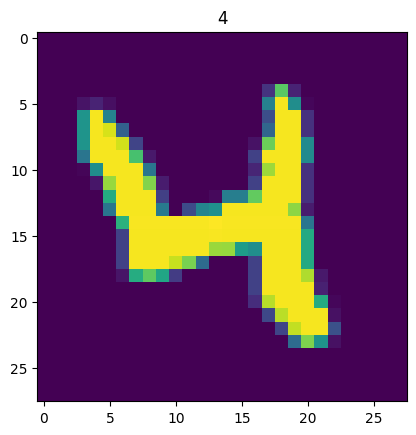

In [269]:
#Testing if the dataset is valid or not
image =  np.asarray(X_train[20]).squeeze()
# image =  X_train[0].reshape(image_size, image_size)
# print(image)
plt.imshow(image)
plt.title(y_train[20])
plt.show()
# Test Acurate for training Data

# Loading Testing Data

In [270]:
#Loading Testing data
f = gzip.open("./Data/t10k-images-idx3-ubyte.gz", "rb")
f.read(16)
buf = f.read(test_num_imgs * image_size * image_size)
X_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test = X_test.reshape(test_num_imgs, image_size, image_size, 1)
#Loading Testing Labels data
f = gzip.open("./Data/t10k-labels-idx1-ubyte.gz", "rb")
f.read(8)
buf = f.read(test_num_imgs)
y_test = np.frombuffer(buf, dtype=np.uint8)

print(y_test.shape)

(2000,)


#### *Checking validity of Test data*

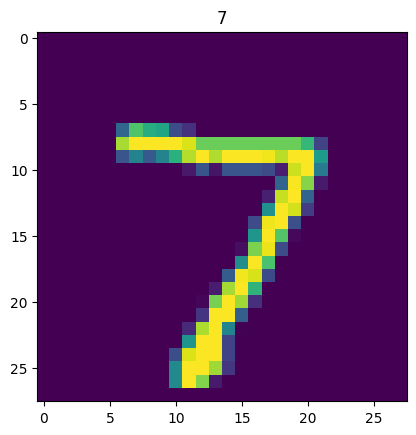

In [271]:
# Test validity for testing Data
image = X_test[0].squeeze()
plt.imshow(image)
plt.title(y_test[0])
plt.show()

In [272]:
from collections import Counter
class KNN:
    def __init__(self, k):
        self.k = k
        self.counter = 0
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    def _predict(self, x): 
        # print("Image Number: ", self.counter)
        self.counter+=1
        distances = [self.cal_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    def cal_distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1-x2)**2))
        return distance

In [273]:
print(X_train.squeeze().shape)
print(y_train.shape)

(10000, 28, 28)
(10000,)


In [274]:

accuracies = []
for k in range(2,9):
    model = KNN(k)
    model.fit(X_train.squeeze(), y_train)
    predictions = model.predict(X_test)
    accuracy = np.sum(predictions == y_test)/ len(y_test)
    accuracies.append((k, accuracy))
    print("predictions Complete for k: ", k)


print("accuracies: ", accuracies)

predictions Complete for k:  2
predictions Complete for k:  3
predictions Complete for k:  4
predictions Complete for k:  5
predictions Complete for k:  6
predictions Complete for k:  7
predictions Complete for k:  8
accuracies:  [(2, 0.108), (3, 0.129), (4, 0.1515), (5, 0.1575), (6, 0.1585), (7, 0.1505), (8, 0.1485)]


In [275]:
accuracy = np.sum(predictions == y_test)/ len(y_test)
print(accuracy)

0.1485


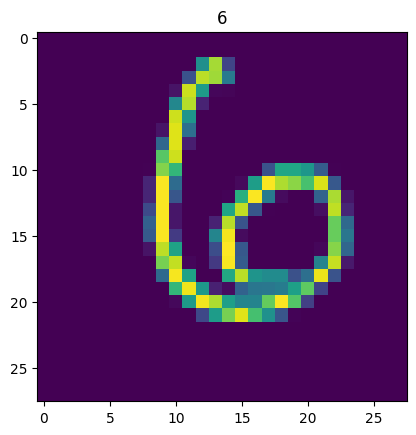

Prediction accuracy:  0.0 %
[1]


In [276]:
pred_index = 100
plt.imshow(X_test[pred_index])
plt.title(y_test[pred_index])
plt.show()

predictions = model.predict([X_test[pred_index]])
accuracy = (np.sum(predictions == y_test[pred_index])/ len(y_test)) * 100
print("Prediction accuracy: ", accuracy, "%")
print(predictions)